# Avatar questionnaire processing  

## Import packages 

In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *

## Function creation

1. extraRow: Creates a function that takes:
 - **df** = a data frame and checks if any of the elements of 
 - **yourlist** have a partial match with the content of the values of 
 - **variable** your variable of interest, if so it assigns the correspondedn matching value to 
 - **newvariable** the name of variable you want as an output 


In [2]:
def extraRow(df,yourlist,variable,newVariable):
    '''Creates a new variable that contains matching data from preexiting variable
    
Parameters
-------------
     
     df: your data frame,
     yourlist: List of values you want to target for the partial match search
     variable: Variable that may cointain the elements on yourlist
     newvariable: Name for  New Variable 
     
returns 
----------

    DataFrame
     '''
    for idx, row in df.iterrows():
        for l in yourlist:
            if l in row[variable]:
                df.loc[idx, newVariable] = l

## Preprocessing 

In [3]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/AvatarQuestionnaire/AvaQuest.csv'
df = pd.read_csv(df_file, sep= ',', header=None)
df.head()

,0,1,2,3
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [4]:
df = df.rename({0: 'order', 1: 'item', 2: 'likert', 3: 'ID'}, axis=1)
df.head()

,order,item,likert,ID
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [5]:
#Initial exploration of the data set 
df.item = df['item'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   order   3864 non-null   int64   
 1   item    3864 non-null   category
 2   likert  3864 non-null   int64   
 3   ID      3864 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 103.6 KB


In [6]:
#Creating Clarity Categorical variable 
df['avatarCat'] = df['item'].str.contains('Sa')
df.loc[:, 'avatarCategory'] = df['avatarCat'].replace({True: 'Standing', False: 'Action'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order           3864 non-null   int64   
 1   item            3864 non-null   category
 2   likert          3864 non-null   int64   
 3   ID              3864 non-null   int64   
 4   avatarCat       3864 non-null   bool    
 5   avatarCategory  3864 non-null   object  
dtypes: bool(1), category(1), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory
0,1,Remember_01_CmA,4,4597,False,Action
1,1,Realistic_01_CmA,3,4597,False,Action
2,1,Attractive_01_CmA,1,4597,False,Action
3,2,Remember_29_Sa,1,4597,True,Standing
4,2,Realistic_29_Sa,2,4597,True,Standing


In [8]:
#Checking that value counts for Action and Standing avatars corresponds with the number of participants
df.avatarCat.value_counts()

False    1932
True     1932
Name: avatarCat, dtype: int64

In [9]:
#List of values for iteration search 
itemCat = ['Remember','Realistic', 'Attractive']

#Searching for a partial string 'ItemCat' in variable 'Item' to creat a new variable 'ItemCat'
extraRow(df,itemCat,'item','itemCategory')
df.tail(5)

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory
3859,55,Realistic_06_CmA,4,9601,False,Action,Realistic
3860,55,Attractive_06_CmA,3,9601,False,Action,Attractive
3861,56,Remember_56_Sa,2,9601,True,Standing,Remember
3862,56,Realistic_56_Sa,4,9601,True,Standing,Realistic
3863,56,Attractive_56_Sa,3,9601,True,Standing,Attractive


In [10]:
#Extracting the Avatar number from the variable 'Item'
AvaIDs = []
for idx, row in df.iterrows():
    num = re.findall(r'\d+', row['item']) 
    AvaIDs.append(num)
    #Flatten the list: Every number was returned as a list of it's own with this we get one unified list
    avatarIDsf = [item for sublist in AvaIDs for item in sublist]


In [11]:
#Searching for a partial string contained in the lists "AvatarIDsf" in variable "Item" to creat a new variable "AvatarID"
extraRow(df,avatarIDsf,'item','avatarID')
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29


In [12]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df.to_csv('CompleteLargeAvatarQues.cvs')

# Descriptives 

In [13]:
#Average values Support and clarity 
df.groupby([ 'ID', 'avatarCategory','itemCategory'])['likert'].mean()

ID    avatarCategory  itemCategory
365   Action          Attractive      2.214286
                      Realistic       3.392857
                      Remember        2.714286
      Standing        Attractive      1.178571
                      Realistic       1.964286
                                        ...   
9601  Action          Realistic       4.000000
                      Remember        2.964286
      Standing        Attractive      2.678571
                      Realistic       4.000000
                      Remember        2.142857
Name: likert, Length: 138, dtype: float64

In [14]:
#Average values Support and clarity 
df.groupby(['ID','avatarCategory','itemCategory'])['likert'].describe().sort_values(by='mean')

count      mean       std  min   25%  50%  \
ID   avatarCategory itemCategory                                              
3976 Standing       Remember       28.0  1.000000  0.000000  1.0  1.00  1.0   
1754 Standing       Remember       28.0  1.035714  0.188982  1.0  1.00  1.0   
3976 Action         Attractive     28.0  1.035714  0.188982  1.0  1.00  1.0   
     Standing       Attractive     28.0  1.035714  0.188982  1.0  1.00  1.0   
365  Standing       Remember       28.0  1.107143  0.566947  1.0  1.00  1.0   
...                                 ...       ...       ...  ...   ...  ...   
5741 Action         Remember       28.0  3.857143  0.931518  2.0  3.00  4.0   
6642 Action         Realistic      28.0  3.892857  0.831745  2.0  3.75  4.0   
9601 Action         Realistic      28.0  4.000000  0.000000  4.0  4.00  4.0   
     Standing       Realistic      28.0  4.000000  0.000000  4.0  4.00  4.0   
3976 Action         Realistic      28.0  4.321429  0.722832  2.0  4.00  4.0   

                                   75%  max  
ID   avatarCategory itemCategory             
3976 Standing       Remember      1.00  1.0  
1754 Standing       Remember      1.00  2.0  
3976 Action         Attractive    1.00  2.0  
     Standing       Attractive    1.00  2.0  
365  Standing       Remember      1.00  4.0  
...                                ...  ...  
5741 Action         Remember      4.25  5.0  
6642 Action         Realistic     4.00  5.0  
9601 Action         Realistic     4.00  4.0  
     Standing       Realistic     4.00  4.0  
3976 Action         Realistic     5.00  5.0  

[138 rows x 8 columns]

In [15]:
AvatarIDsL = df.pivot_table('likert',  'avatarID').sort_values(by='likert')
AvatarIDsL

,likert
avatarID,
33,1.521739
53,1.695652
31,1.724638
37,1.782609
45,1.811594
27,1.855072
39,1.913043
32,1.971014
51,2.000000


## Data Visualization

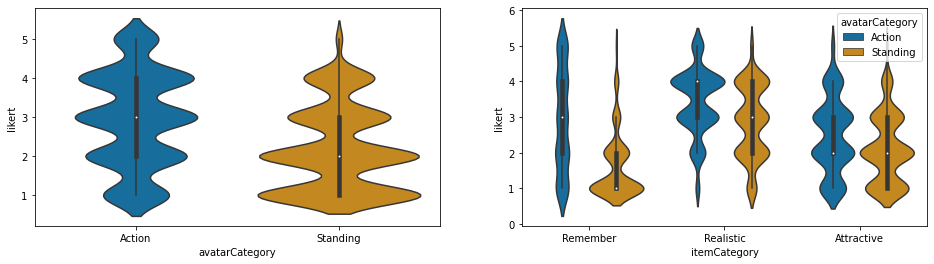

In [16]:
sns.set_palette('colorblind')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.violinplot(data= df, x='avatarCategory', y='likert', ax=axes[0])
sns.violinplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory',  ax=axes[1])
plt.show()

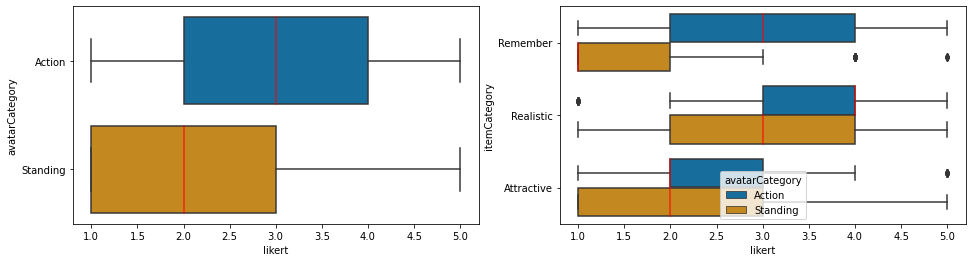

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.boxplot(data= df, y='avatarCategory', x='likert', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[0])
sns.boxplot(data= df, y='itemCategory', x='likert', hue= 'avatarCategory', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[1])
plt.show()

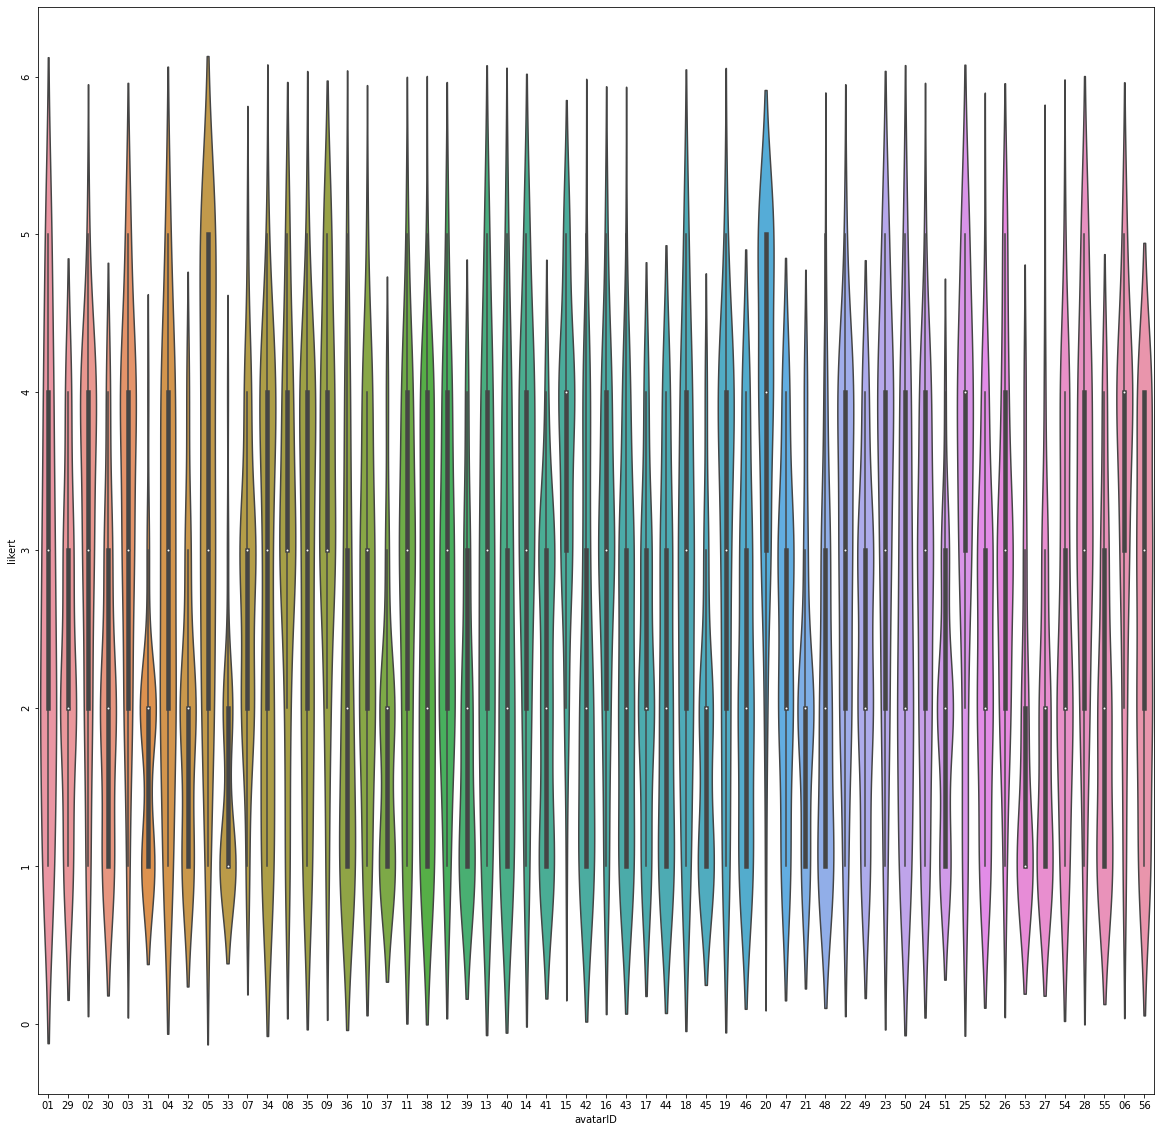

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
sns.violinplot(data= df, x='avatarID', y='likert', scale='width')
plt.yticks(rotation=90)
plt.show()

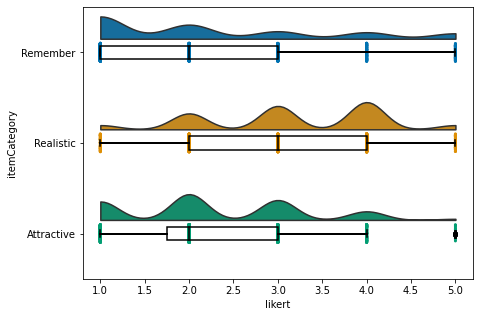

In [19]:
dy='itemCategory'; dx='likert'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
               saturation = 1, orient = ort) 

## Data analysis

In [20]:
from statsmodels.stats.anova import AnovaRM
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 

In [21]:
df1 = df[df['itemCategory']== 'Remember']
df1.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
6,3,Remember_02_CmA,4,4597,False,Action,Remember,02
9,4,Remember_30_Sa,1,4597,True,Standing,Remember,30
12,5,Remember_03_CmA,5,4597,False,Action,Remember,03


In [22]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot = pd.DataFrame(df1.groupby([ 'ID', 'avatarCategory'])['likert'].sum())
#Reformat to a wide dataframe
AvatarSum = pd.DataFrame(Topivot.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum.reset_index(drop=True)

avatarCategory,Action,Standing
0,76,31
1,47,29
2,97,41
3,94,49
4,63,48
5,53,28
6,84,31
7,93,35
8,65,48
9,90,35


In [23]:
AvatarSum.rename(columns={
    AvatarSum.columns[0]: 'avatar_action_likert',
    AvatarSum.columns[1]: 'avatar_standing_likert'}, inplace=True)

In [24]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
AvatarSum.to_csv('AvatarSum.csv')

In [25]:
print(AnovaRM(data=df1, depvar='likert', subject='ID', within=['avatarCategory'], aggregate_func = 'median').fit())

                   Anova
               F Value Num DF  Den DF Pr > F
--------------------------------------------
avatarCategory 60.9040 1.0000 22.0000 0.0000



In [26]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [27]:
# Define model formula
formula = 'avatarCat ~ likert'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_GLM).fit()
print(model_LM.summary())

                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['avatarCat[False]', 'avatarCat[True]']   No. Observations:                 1288
Model:                                                 GLM   Df Residuals:                     1286
Model Family:                                     Binomial   Df Model:                            1
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -725.11
Date:                                     Wed, 18 May 2022   Deviance:                       1450.2
Time:                                             11:36:41   Pearson chi2:                 1.27e+03
No. Iterations:                                          4                                         
Covariance Type:                                 nonrobust                                         


In [28]:
# Define model formula
formula = 'likert ~ avatarCat '

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 1288
Model:                            GLM   Df Residuals:                     1286
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.3865
Method:                          IRLS   Log-Likelihood:                -2037.0
Date:                Wed, 18 May 2022   Deviance:                       1783.0
Time:                        11:36:41   Pearson chi2:                 1.78e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9084      0.04

In [29]:
# Define model formula
formula = 'likert ~ avatarCat * itemCategory'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 3864
Model:                            GLM   Df Residuals:                     3858
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          1.1037
Method:                          IRLS   Log-Likelihood:                -5670.3
Date:                Wed, 18 May 2022   Deviance:                       4257.9
Time:                        11:36:41   Pearson chi2:                 4.26e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------